In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
path = r"F:\Work\SOCAAutomation\Dataset\Images\VisibilityEstimation"
Files = os.listdir(path)
Files = sorted(Files, key = lambda x: int(os.path.splitext(x)[0]))

In [15]:
def edge_detection(gray):    
    gradx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    grady = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
    return gradx, grady, gray

In [7]:
grad_mag_list = []
for frame in Files:
    gradx, grady, gray = edge_detection(path + "/" + frame)
    grad_mag = cv.magnitude(gradx, grady)
    grad_mag_norm = cv.normalize(grad_mag, None, 0, 255, cv.NORM_MINMAX)
    comb_img = cv.addWeighted(gradx, 0.5, grady, 0.5, 0)
    grad_mag_list.append(comb_img.sum())

In [6]:
print(gradx.sum(), grady.sum(), grad_mag.sum(), comb_img.sum())

105094.0 500236.0 8974726.127102105 302665.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '1.png'),
  Text(1, 0, '2.png'),
  Text(2, 0, '3.png'),
  Text(3, 0, '4.png'),
  Text(4, 0, '5.png'),
  Text(5, 0, '6.png'),
  Text(6, 0, '7.png'),
  Text(7, 0, '8.png'),
  Text(8, 0, '9.png'),
  Text(9, 0, '10.png'),
  Text(10, 0, '11.png'),
  Text(11, 0, '12.png'),
  Text(12, 0, '13.png'),
  Text(13, 0, '14.png')])

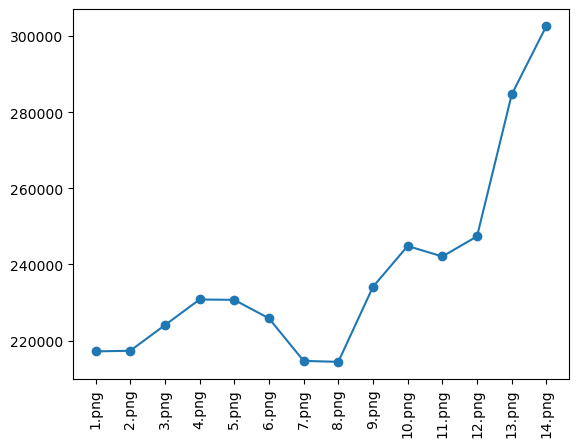

In [8]:
plt.plot(Files, grad_mag_list, marker='o')
plt.xticks(rotation=90)

(-0.5, 703.5, 575.5, -0.5)

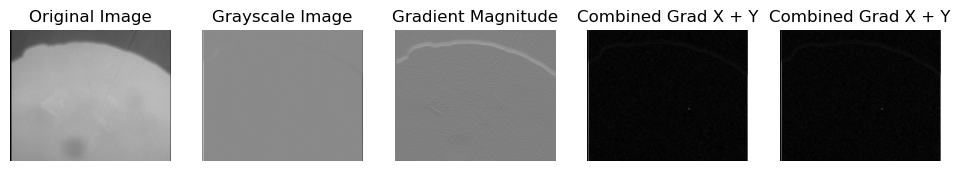

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title("Grayscale Image")
plt.imshow(gradx, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("Gradient Magnitude")
plt.imshow(grady, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag, cmap='gray')  # Take absolute for visualization
plt.axis("off")

plt.subplot(1, 5, 5)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag_norm, cmap='gray')  # Take absolute for visualization
plt.axis("off")

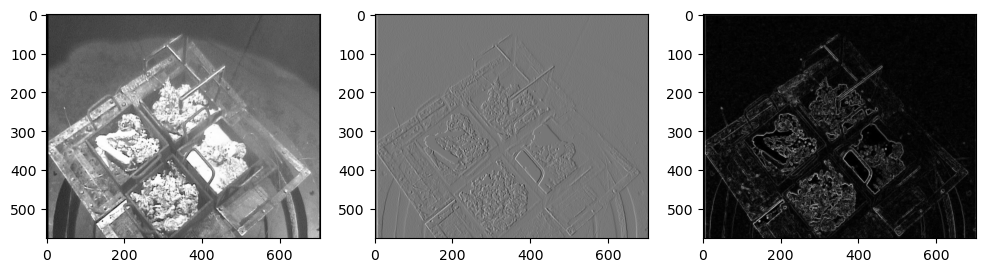

In [17]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.imshow(ref_gray, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(ref_gradx, cmap='gray')
plt.subplot(1,3,3)
ref_grad_mag = cv.magnitude(ref_gradx, ref_grady)

plt.imshow(cv.normalize(ref_grad_mag, None, 0, 255, cv.NORM_MINMAX), cmap='gray')

In [23]:
def plot_images2by2(img1, img2):    
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray')

In [17]:
## Gaussian Blur

In [24]:
def preprocess(img, kernelsize):
    gray_img = convertgray(img)
    img1_blur = cv.GaussianBlur(gray_img, (kernelsize, kernelsize), 0)
    gradx, grady, a = edge_detection(img1_blur)
    grad_mag = cv.magnitude(gradx, grady)
    grad_mag_norm = cv.normalize(grad_mag, None, 0, 255, cv.NORM_MINMAX)
    return grad_mag_norm

In [25]:
def convertgray(File):
    img = cv.imread(File)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return gray

In [34]:
frames = Files
img_transform = []
gray_images = []
for i in range(len(Files)):
    img_transform.append(preprocess(path + "/" + frames[i], 5))
    gray_images.append(convertgray(path + "/" + frames[i]))

    

# for j in range(1, len(Files)):
#     plot_images2by2(img_transform[0], img_transform[j])
#     plot_images2by2(gray_images[0], gray_images[j])

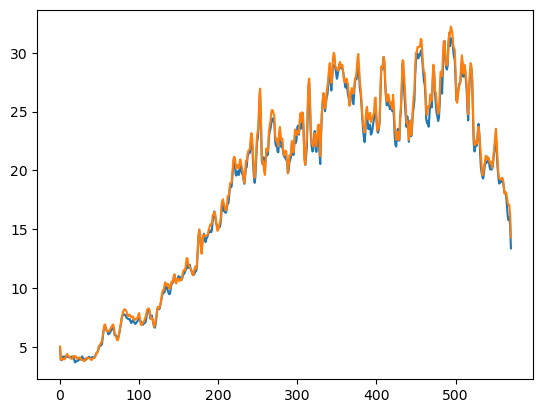

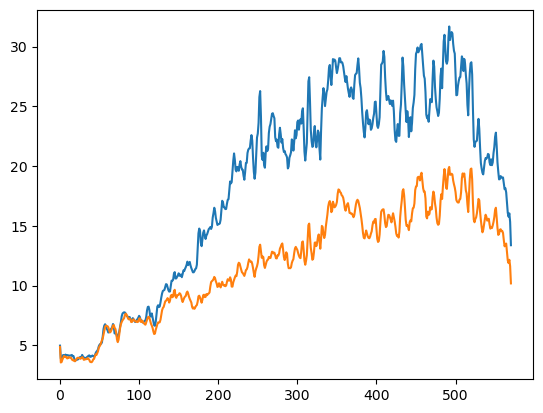

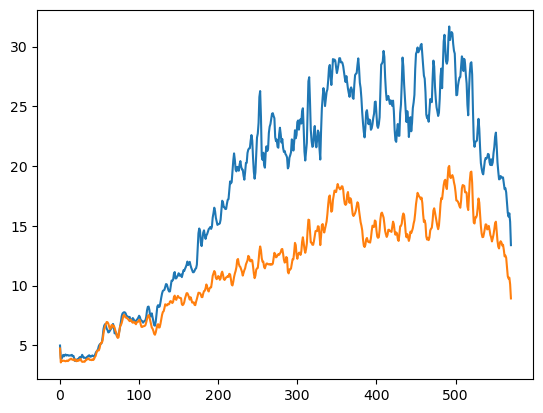

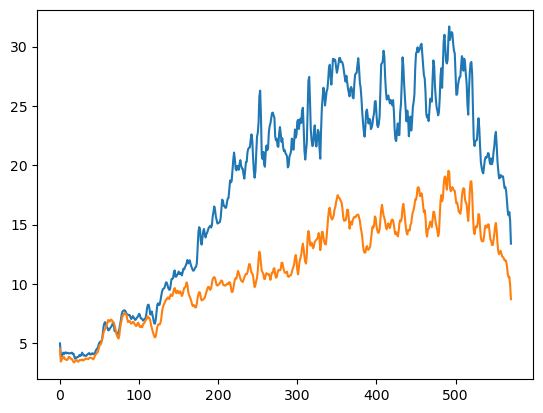

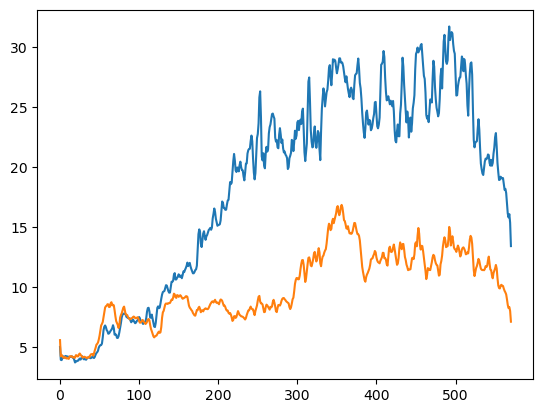

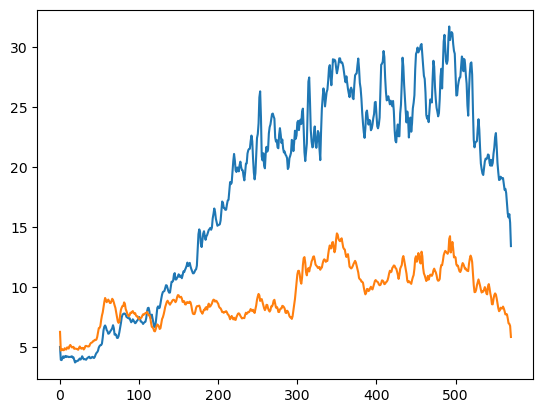

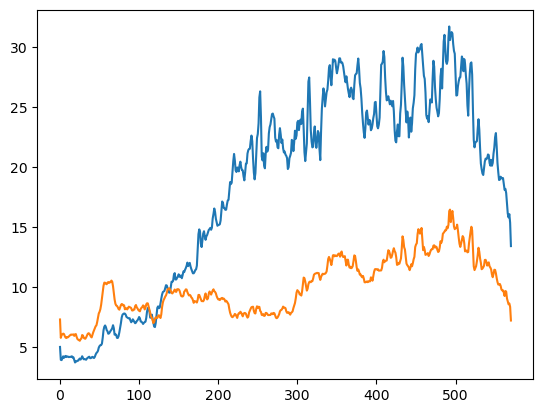

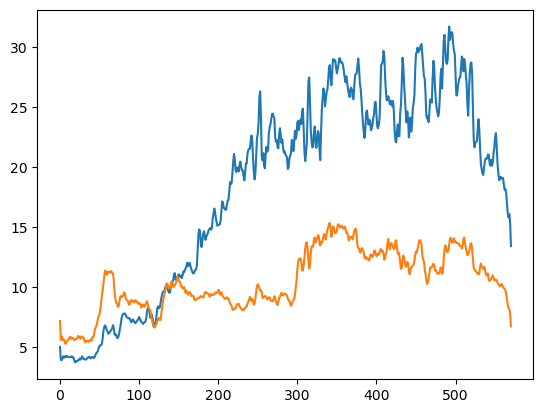

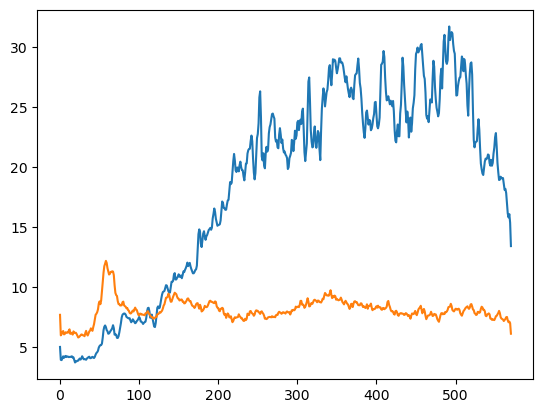

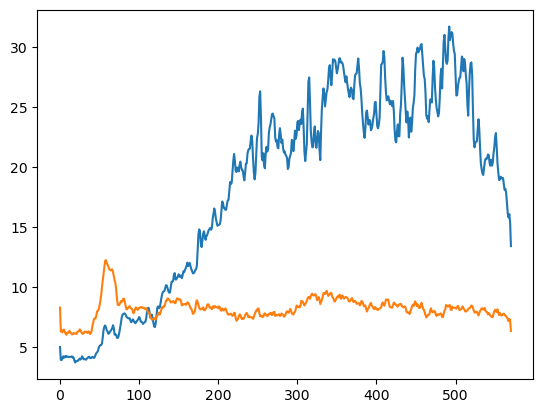

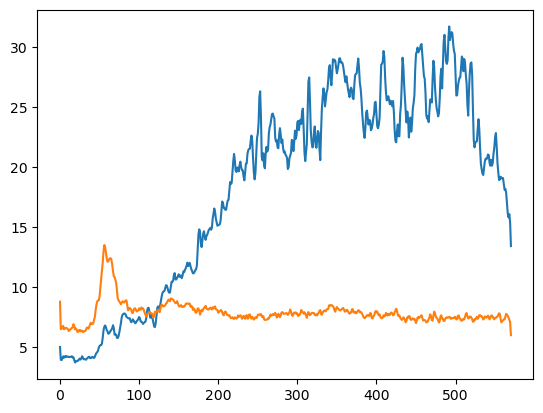

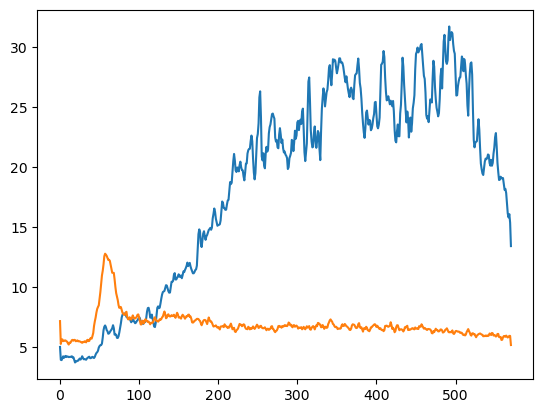

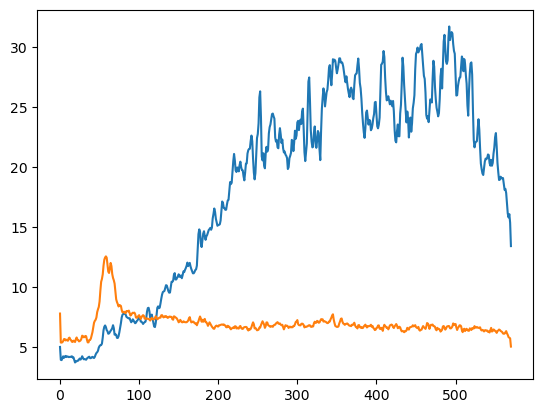

In [36]:
# Horizontal Mean
means = []
for j in range(1, len(Files)):
    plt.plot(np.mean(img_transform[0], axis=1)[5:])
    plt.plot(np.mean(img_transform[j], axis=1)[5:])
    means.append(np.mean(img_transform[j]))
    plt.show()

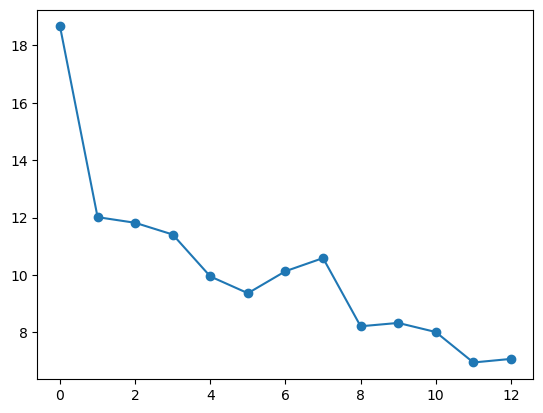

In [37]:
plt.plot(means, marker='o')

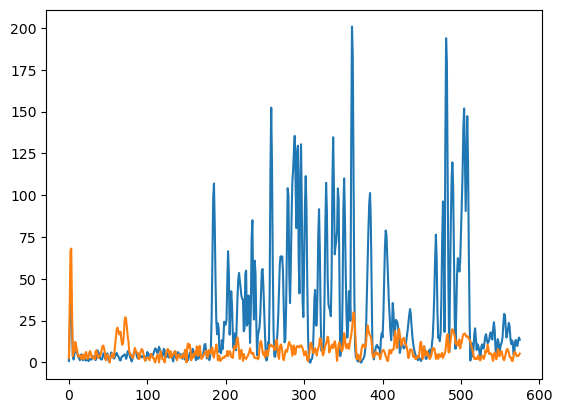

In [30]:
# At Random Horizontal line
plt.plot(img_transform[0][:,200])
plt.plot(img_transform[1][:,200])

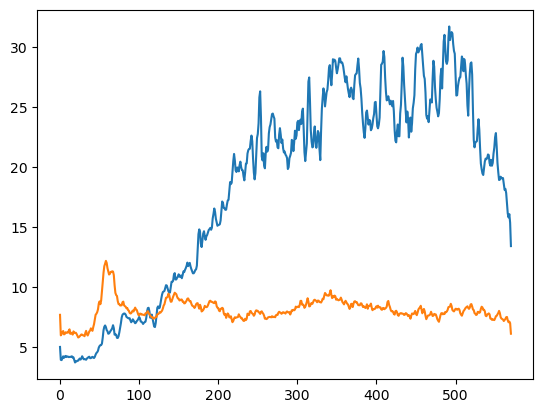

In [33]:
# Horizontal Mean
plt.plot(np.mean(img_transform[0], axis=1)[5:])
plt.plot(np.mean(img_transform[1], axis=1)[5:])

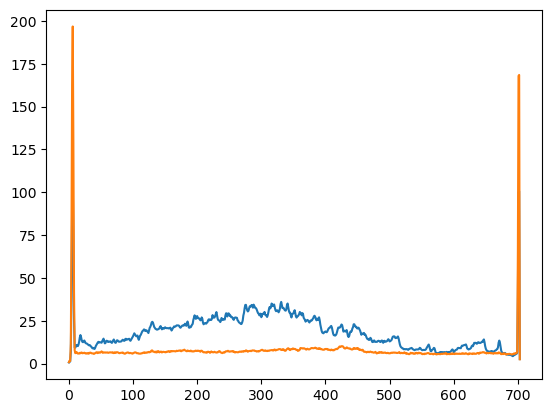

In [32]:
# Vertical Mean
plt.plot(np.mean(img_transform[0], axis=0))
plt.plot(np.mean(img_transform[1], axis=0))